
# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#!pip install -U matplotlib seaborn
import pandas as pd
import requests as r
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=r.get(url)
response.status_code

200

In [4]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
df_ip=pd.read_csv('image_predictions.tsv', sep='\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
df_tweetjson=pd.read_json('tweet.json', lines=True)
df_tweetjson.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",32882,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,6876,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",28416,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5177,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",21363,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3421,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",35855,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7085,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",34302,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7595,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
df_tweetjson.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [8]:
dfs = pd.merge(df_archive, df_ip, left_on='tweet_id', right_on='tweet_id')
dfs = pd.merge(dfs, df_tweetjson, left_on='tweet_id', right_on='id')

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
dfs

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ht

In [10]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 2054
Data columns (total 60 columns):
tweet_id                         2055 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2055 non-null object
source_x                         2055 non-null object
text                             2055 non-null object
retweeted_status_id              69 non-null float64
retweeted_status_user_id         69 non-null float64
retweeted_status_timestamp       69 non-null object
expanded_urls                    2055 non-null object
rating_numerator                 2055 non-null int64
rating_denominator               2055 non-null int64
name                             2055 non-null object
doggo                            2055 non-null object
floofer                          2055 non-null object
pupper                           2055 non-null object
puppo                            2055 

In [11]:
dfs['name'].value_counts()

None        569
a            55
Oliver       10
Tucker       10
Penny        10
Cooper       10
Charlie      10
Lucy          9
Lola          8
Sadie         8
Bo            8
Winston       8
the           7
an            7
Toby          7
Daisy         7
Koda          6
Bailey        6
Milo          6
Bella         6
Dave          6
Scout         6
Rusty         6
Stanley       6
Jax           6
Louis         5
Buddy         5
Chester       5
Alfie         5
Larry         5
           ... 
Beebop        1
Aldrick       1
Dietrich      1
Chloe         1
Jazzy         1
Poppy         1
Dido          1
Binky         1
Torque        1
Pippin        1
Dixie         1
Mattie        1
Glacier       1
Kody          1
Zeek          1
Karll         1
Brandi        1
Bradley       1
Heinrich      1
Strider       1
Orion         1
Gidget        1
Dudley        1
Philbert      1
Rambo         1
Mairi         1
Jersey        1
Harnold       1
Shadoe        1
Scott         1
Name: name, Length: 934,

In [12]:
dfs.describe()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,2.055000e+03,2.300000e+01,2.300000e+01,6.900000e+01,6.900000e+01,2055.000000,2055.000000,2055.000000,2055.000000,2.055000e+03,2.055000e+03,0.0,0.0,2055.000000,0.0,2.055000e+03,2.055000e+03,2.300000e+01,2.300000e+01,2.300000e+01,2.300000e+01,2055.0,2055.0,0.0,0.0,2055.000000
mean,7.376509e+17,6.978112e+17,4.196984e+09,7.580948e+17,1.141249e+16,12.266180,10.516302,1.204380,0.594349,1.347833e-01,6.039473e-02,NaN,NaN,7248.547445,NaN,7.376509e+17,7.376509e+17,6.978112e+17,6.978112e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,2319.576156
std,6.749357e+16,4.359384e+16,0.000000e+00,5.653271e+16,9.479926e+16,40.877637,7.211751,0.563478,0.271303,1.007655e-01,5.101412e-02,NaN,NaN,10961.871151,NaN,6.749357e+16,6.749357e+16,4.359384e+16,4.359384e+16,0.000000e+00,0.000000e+00,0.0,0.0,NaN,NaN,4053.727605
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.671522e+17,6.671522e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,11.000000
25%,6.762285e+17,6.732411e+17,4.196984e+09,7.076109e+17,4.196984e+09,10.000000,10.000000,1.000000,0.363272,5.388625e-02,1.622240e-02,NaN,NaN,1384.500000,NaN,6.762285e+17,6.762285e+17,6.732411e+17,6.732411e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,493.000000
50%,7.109971e+17,6.757073e+17,4.196984e+09,7.750851e+17,4.196984e+09,11.000000,10.000000,1.000000,0.587764,1.186470e-01,4.947150e-02,NaN,NaN,3174.000000,NaN,7.109971e+17,7.109971e+17,6.757073e+17,6.757073e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,1094.000000
75%,7.925842e+17,7.031489e+17,4.196984e+09,7.939622e+17,4.196984e+09,12.000000,10.000000,1.000000,0.844583,1.957615e-01,9.217055e-02,NaN,NaN,9000.500000,NaN,7.925842e+17,7.925842e+17,7.031489e+17,7.031489e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,2671.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.650134e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,NaN,NaN,141643.000000,NaN,8.924206e+17,8.924206e+17,8.558181e+17,8.558181e+17,4.196984e+09,4.196984e+09,0.0,0.0,NaN,NaN,69400.000000


In [13]:
dfs['p1'].value_counts()

golden_retriever             150
Labrador_retriever            96
Pembroke                      88
Chihuahua                     81
pug                           57
chow                          44
Samoyed                       42
Pomeranian                    38
toy_poodle                    38
malamute                      30
cocker_spaniel                30
French_bulldog                25
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      18
Maltese_dog                   18
beagle                        18
Staffordshire_bullterrier     18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [14]:
dfs['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   89
Cardigan                           73
Chihuahua                          44
Chesapeake_Bay_retriever           41
Pomeranian                         41
French_bulldog                     40
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
miniature_pinscher                 20
malinois                           20
chow                               20
Samoyed                            20
Norwegian_elkhound                 19
toy_terrier                        19
American_Staffordshire_terrier     19
Boston_bull                        18
Staffordshir

In [15]:
dfs['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kuvasz                            34
kelpie                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            29
toy_poodle                        29
Pekinese                          29
cocker_spaniel                    29
Pomeranian                        28
Great_Pyrenees                    27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Chesapeake_Bay_retriever          24
Cardigan                          23
pug                               22
basenji                           21
bull_mastiff                      20
Siberian_husky                    19
toy_terrier                       19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [16]:
dfs.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ht

## Quality issues
1. Use isnull() to filter and only keep rows where retweeted_status_id column is NaN

2. Columns not needed ( in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

3. Tweet_id in wrong datatype

4. Timestamp in wrong format

5. Naming issues

6. Create new columns: dog_breed and db_conf

7. Inconsistent capitalization in dog_breed column

8. Source column in html formal, need cleaning

### Tidiness issues
1. All dog types(doggo, floofer, pupper, puppo) should be merged into one column named 'Dog_types'

2. Clean text column, split text and url into different columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
dfs_clean = dfs.copy()

### Issue #1: QUALITY

#### (1)Define: Use isnull() to filter and only keep rows where retweeted_status_id column is NaN

#### Code&Test

In [18]:
dfs_clean = dfs_clean[dfs_clean.retweeted_status_id.isnull()]

In [19]:
dfs_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ht

#### (2)Define: Drop columns not needed ( in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp)

#### Code&Test

In [20]:
dfs_clean = dfs_clean.drop(['in_reply_to_status_id_x','in_reply_to_status_id_y','in_reply_to_user_id_x','in_reply_to_user_id_y','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp'], 1)

In [21]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 53 columns):
tweet_id                         1986 non-null int64
timestamp                        1986 non-null object
source_x                         1986 non-null object
text                             1986 non-null object
expanded_urls                    1986 non-null object
rating_numerator                 1986 non-null int64
rating_denominator               1986 non-null int64
name                             1986 non-null object
doggo                            1986 non-null object
floofer                          1986 non-null object
pupper                           1986 non-null object
puppo                            1986 non-null object
jpg_url                          1986 non-null object
img_num                          1986 non-null int64
p1                               1986 non-null object
p1_conf                          1986 non-null float64
p1_dog                          

#### (3)Define: Change tweet_id from an integer to a string

#### Code&Test

In [22]:
dfs_clean['tweet_id'] = dfs_clean['tweet_id'].astype(str)

In [23]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 53 columns):
tweet_id                         1986 non-null object
timestamp                        1986 non-null object
source_x                         1986 non-null object
text                             1986 non-null object
expanded_urls                    1986 non-null object
rating_numerator                 1986 non-null int64
rating_denominator               1986 non-null int64
name                             1986 non-null object
doggo                            1986 non-null object
floofer                          1986 non-null object
pupper                           1986 non-null object
puppo                            1986 non-null object
jpg_url                          1986 non-null object
img_num                          1986 non-null int64
p1                               1986 non-null object
p1_conf                          1986 non-null float64
p1_dog                         

#### (4)Define: Change the timestamp to correct datetime format

#### Code&Test

In [24]:
dfs_clean.timestamp = pd.to_datetime(dfs_clean.timestamp)


In [25]:
dfs_clean['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### (5)Define: Correct naming issues

#### Code&Test

In [26]:
dfs_clean.name = dfs_clean.name.str.replace('^[a-z]+', 'None')

In [27]:
dfs_clean['name'].value_counts()

None        643
Oliver       10
Charlie      10
Cooper       10
Tucker        9
Lucy          9
Penny         9
Sadie         8
Winston       8
Lola          7
Toby          7
Daisy         7
Bo            6
Stanley       6
Jax           6
Koda          6
Bella         6
Bailey        5
Chester       5
Louis         5
Dave          5
Scout         5
Rusty         5
Buddy         5
Oscar         5
Leo           5
Milo          5
Sophie        4
Oakley        4
Phil          4
           ... 
Jessifer      1
Ashleigh      1
Beebop        1
Aldrick       1
Happy         1
Shadoe        1
Hercules      1
Olaf          1
Brandi        1
Link          1
Binky         1
Pippin        1
Crawford      1
Mattie        1
Glacier       1
Kody          1
Zeek          1
Karll         1
Bradley       1
Butter        1
Torque        1
Heinrich      1
Orion         1
Gidget        1
Dudley        1
Philbert      1
Rambo         1
Mairi         1
Jersey        1
Scott         1
Name: name, Length: 912,

#### (6)Define: Create new columns: dog_breed and db_conf

#### Code&Test

In [28]:
dog_breed = []
db_conf = []

def dfs(dfs_clean):
    if dfs_clean.p1_dog == True:
        dog_breed.append(dfs_clean.p1)
        db_conf.append(dfs_clean.p1_conf)
    elif dfs_clean.p2_dog == True:
        dog_breed.append(dfs_clean.p2)
        db_conf.append(dfs_clean.p2_conf)
    elif dfs_clean.p3_dog == True:
        dog_breed.append(dfs_clean.p3)
        db_conf.append(dfs_clean.p3_conf)
    else:
        dog_breed.append('Unknown_breed')
        db_conf.append(0)
                
dfs_clean.apply(dfs,1)

dfs_clean['dog_breed'] = dog_breed
dfs_clean['db_conf'] = db_conf

# Drop columns no longer needed
dfs_clean = dfs_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],1)

In [29]:
dfs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2054
Data columns (total 45 columns):
tweet_id                         1986 non-null object
timestamp                        1986 non-null datetime64[ns]
source_x                         1986 non-null object
text                             1986 non-null object
expanded_urls                    1986 non-null object
rating_numerator                 1986 non-null int64
rating_denominator               1986 non-null int64
name                             1986 non-null object
doggo                            1986 non-null object
floofer                          1986 non-null object
pupper                           1986 non-null object
puppo                            1986 non-null object
jpg_url                          1986 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1986 non-null datetime64[ns]
display_text_range 

#### (7)Define: Fix inconsistent capitalization in dog_breed column

#### Code&Test

In [30]:
dfs_clean.dog_breed = dfs_clean.dog_breed.str.capitalize()

In [31]:
dfs_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_breed,db_conf
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,...",Unknown_breed,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89217741319

#### (8)Define: Clean source column

#### Code&Test

In [32]:
dfs_clean.source_x = dfs_clean.source_x.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})
dfs_clean.source_y = dfs_clean.source_y.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})


In [33]:
dfs_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_breed,db_conf
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,...",Unknown_breed,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https

### Issue #2: TIDINESS

#### (1)Define: All dog types(doggo, floofer, pupper, puppo) should be merged into one column named 'Dog_types'

#### Code&Test

In [34]:
dfs_clean['dog_type'] = dfs_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

dfs_clean = dfs_clean.drop(['doggo','floofer','pupper','puppo'],1)

In [35]:
dfs_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_breed,db_conf,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,892420643555336193,892420643555336192,None,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,...",Unknown_breed,0.000000,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0

#### (2)Define: clean text column, split text and url into different columns

#### Code&Test

In [36]:
text_clean = []
text_url = [] 

for index in dfs_clean.text:
    text_clean.append(' '.join(index.split(" ")[:-1]))
    text_url.append(index.split(" ")[-1])

dfs_clean.text = text_clean

dfs_clean = pd.concat([dfs_clean, pd.DataFrame(text_url, columns = ['text_url'])],1)

In [37]:
dfs_clean.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_y,truncated,user,dog_breed,db_conf,dog_type,text_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",32882.0,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,8.924206e+17,8.924206e+17,None,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6876.0,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs®', 'screen_name': 'dog_rates', 'location': '', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➜ WeRateDogs partnerships@weratedogs.com | nonprofit: @15outof10 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 'url': 'https://t.co/YPc2XqmwyC', 'entities': {'url': {'urls': [{'url': 'https://t.co/YPc2XqmwyC', 'expanded_url': 'http://links.weratedogs.com', 'display_url': 'links.weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 9380933, 'friends_count': 21, 'listed_count': 7850, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 147505, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 17699, 'lang': None,...",Unknown_breed,0.000000,NaN,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'ex

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [38]:
dfs_clean.to_csv("twitter_archive_master.csv", index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. I've analyzed the wrangles WeRateDogs data to determine what dog breed has the most popularity. I have also created a visualization below(Visualization 1) to show the results of my analysis, with this visualization, we can easily see that the Golden retriever is the most popular Dog breed with a count of 158. I used a bar chart for this visualization because its a categorical data and i think it will be best explained this chart.

2. Similarly, I've also analysed the data to figure out which of the 4 dog types has the popularity and have created a visualization below(Visualization 2) to show the result of my analysis, thus we can easily see that the most popular dog type is the pupper with a count of 223. I used a pie chart as i felt this type of chart depicted the information perfectly than any other type of chart. 

3. Lastly, I've analysed the total number of tweets over time and visualized to showthe rate at which the tweets increased and decreased over time. I used a line chart for this as it best shows the relationship with time.

### Visualization 1(Most Popular Dog Breed)

In [39]:
breeds_10_top = pd.DataFrame(dfs_clean['dog_breed'].value_counts()[1:11]).reset_index()
breeds_10_top
breeds_10_top.columns = ['breed', 'count']
breeds_10_top

,breed,count
0,Golden_retriever,158
1,Labrador_retriever,105
2,Pembroke,95
3,Chihuahua,91
4,Pug,62
5,Toy_poodle,50
6,Chow,48
7,Pomeranian,42
8,Samoyed,41
9,Malamute,33


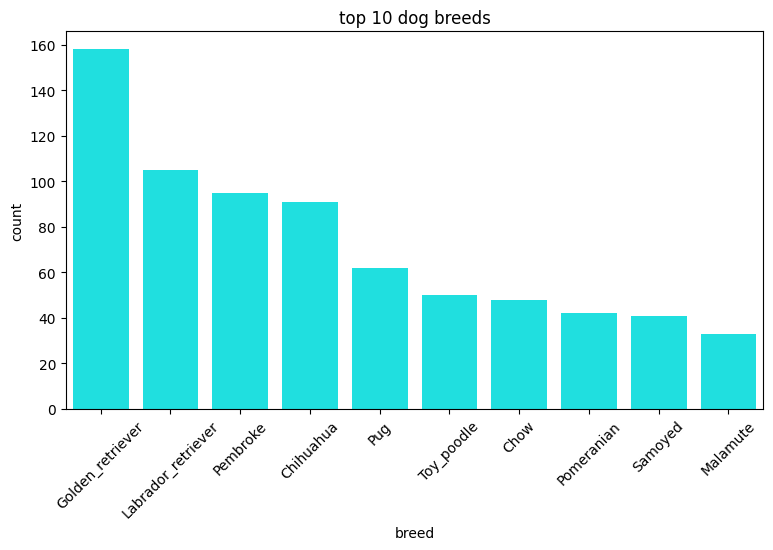

In [40]:
fig, axes = plt.subplots(1,1, figsize=(9,5), dpi=100)

sns.barplot(data=breeds_10_top, x='breed', y='count', color='cyan', ax=axes)

axes.set_title('top 10 dog breeds')
axes.tick_params('x',labelrotation=45)
plt.savefig('breeds.png'); 

### Visualization 2(Most popular Dog Type)

In [41]:
top_dog_type = pd.DataFrame(dfs_clean['dog_type'].value_counts()).reset_index()
top_dog_type
top_dog_type.columns = ['dog_type', 'count']
top_dog_type

,dog_type,count
0,pupper,223
1,doggo,71
2,puppo,27
3,floofer,3


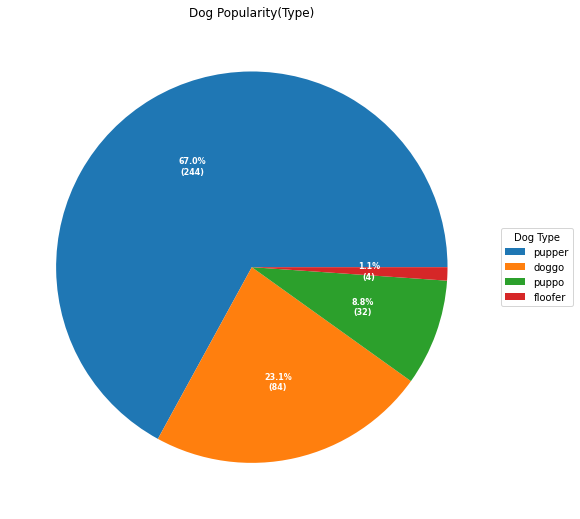

In [42]:
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw=dict(aspect="equal"))

dogs = ["244 pupper",
          "84 doggo",
          "32 puppo",
          "4 floofer"]

data = [float(x.split()[0]) for x in dogs]
dog_type = [x.split()[-1] for x in dogs]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, dog_type,
          title="Dog Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Dog Popularity(Type)")

plt.savefig('types.png')

### Visualization 3(Total number of tweets over time)

In [43]:
dfs_clean.timestamp = pd.to_datetime(dfs_clean['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = dfs_clean.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

tweet_id    1986
dtype: int64

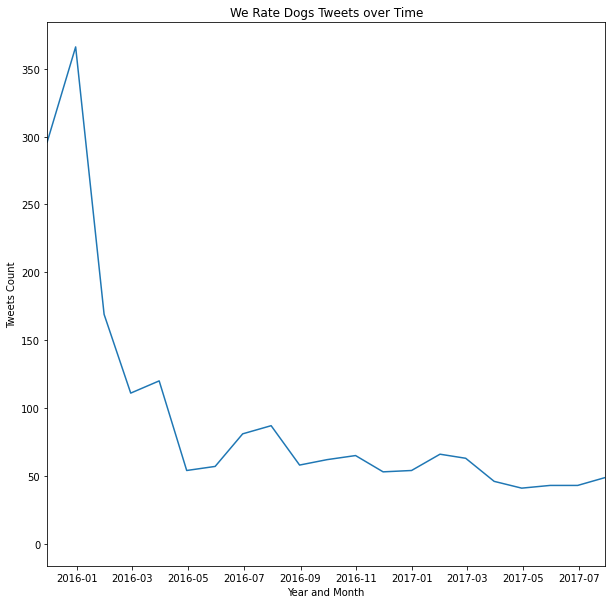

In [44]:
plt.figure(figsize=(10, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');
plt.savefig('tweets_over_time.png')